# Removing Outliers Using Z‑Score

## Overview
The z‑score method identifies outliers by measuring how many standard deviations a data point is from the mean. It assumes data are approximately normally distributed; points with large absolute z‑scores are potential outliers.

## Definition
For a value x in a sample with mean μ and standard deviation σ, the z‑score is:
\[
z = \frac{x - \mu}{\sigma}
\]

## Typical Thresholds
- |z| > 3 : common rule-of-thumb (≈0.3% two‑tailed under normality).
- |z| > 2.5 or |z| > 2 may be used for more sensitive detection.
Choose threshold based on domain knowledge and sample size.

## Procedure (univariate)
1. Compute mean μ and standard deviation σ of the variable.
2. Compute z = (x − μ) / σ for each observation.
3. Mark observations with |z| above the chosen threshold as outliers.
4. Decide action:
    - Remove rows with outliers.
    - Replace outliers (e.g., with median, trimmed mean, or winsorize).
    - Keep but flag for downstream analysis.

## Practical considerations
- Sensitivity to mean and sd: z‑scores use μ and σ, so extreme values influence them. For small samples or heavy tails, method can underperform.
- Use robust alternatives when distribution is nonnormal (see below).
- For multivariate data, use Mahalanobis distance rather than per-variable z‑scores.
- Iterative removal: removing outliers changes μ and σ; if repeated, recompute after each removal (beware of bias).

## Robust alternative (median absolute deviation, MAD)
Compute robust z:
\[
\text{robust\_z} = \frac{x - \text{median}}{\text{MAD}}, \quad \text{MAD} = \text{median}(|x - \text{median}|)
\]
Scale MAD by 1.4826 to make it comparable to σ for normal data.

Use domain knowledge and visualization (boxplots, histograms, QQ plots) alongside z‑score checks before removing data.

In [1]:
import pandas as pd
import seaborn as sn

# Weight–Height Dataset

This example uses the Weight Height Dataset from Kaggle  
The dataset contains records of individuals **heights** and **weights**, making it useful for demonstrating **outlier detection using standard deviation**.

## Dataset Download
You can download the dataset from Kaggle here:  
[Weight Height Dataset (Kaggle)](https://www.kaggle.com/datasets/mustafaali96/weight-height)

## Usage Instructions
1. Download the dataset from Kaggle.
2. Place the file **`weight-height.csv`** in your working directory.
3. Use the following code to load the dataset:


In [2]:
df = pd.read_csv("../data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Count'>

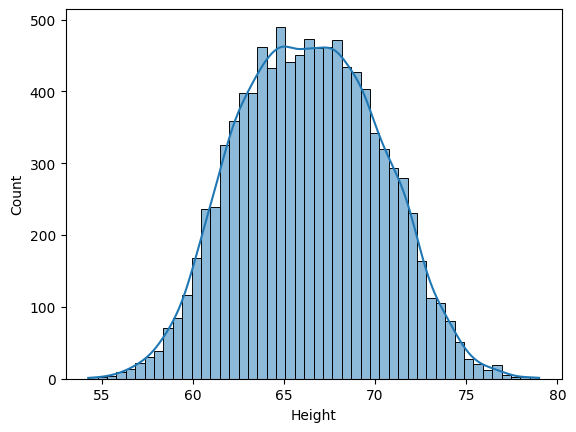

In [3]:
sn.histplot(df.Height, kde=True)

In [4]:
mean = df.Height.mean()
print(f"Mean:{mean}")

Mean:66.36755975482124


In [6]:
df['zscore'] = ( df.Height - mean ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [8]:
df.Height.std()

np.float64(3.847528120773229)

In [18]:
# It is the same as the z-score at index 0; I calculated it to check whether it is correct.
(73.84-66.37)/3.84

1.9453124999999998

In [12]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [13]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [17]:
df_no_outlier=df[(df['zscore']<3)&(df["zscore"]>-3)]
df_no_outlier.shape

(9993, 4)